In [1]:
import pandas as pd

df = pd.read_csv("./CDS_Preprocessed_Data.csv")

In [2]:
df = df.drop(columns=['Unnamed: 0'], axis='column')
df.columns

Index(['PRICE', 'ROUNDED_NOTIONAL_AMOUNT_1', 'ACTION_CANCEL', 'ACTION_CORRECT',
       'ACTION_NEW', 'TAXONOMY_Credit:Index:CDX:CDXHY',
       'TAXONOMY_Credit:Index:CDX:CDXIG',
       'PRICE_FORMING_CONTINUATION_DATA_Amendment',
       'PRICE_FORMING_CONTINUATION_DATA_Novation',
       'PRICE_FORMING_CONTINUATION_DATA_Partialtermination',
       'PRICE_FORMING_CONTINUATION_DATA_Trade', 'CLEARED_C', 'CLEARED_U',
       'INDICATION_OF_COLLATERALIZATION_FC',
       'INDICATION_OF_COLLATERALIZATION_OC',
       'INDICATION_OF_COLLATERALIZATION_PC',
       'INDICATION_OF_COLLATERALIZATION_UC'],
      dtype='object')

In [3]:
df.to_hdf("./CDS_Preprocessed_Data_dummies.h5.gz", key="CDS", complib="zlib", complevel=9, mode='w')

In [4]:
df.head()

,PRICE,ROUNDED_NOTIONAL_AMOUNT_1,ACTION_CANCEL,ACTION_CORRECT,ACTION_NEW,TAXONOMY_Credit:Index:CDX:CDXHY,TAXONOMY_Credit:Index:CDX:CDXIG,PRICE_FORMING_CONTINUATION_DATA_Amendment,PRICE_FORMING_CONTINUATION_DATA_Novation,PRICE_FORMING_CONTINUATION_DATA_Partialtermination,PRICE_FORMING_CONTINUATION_DATA_Trade,CLEARED_C,CLEARED_U,INDICATION_OF_COLLATERALIZATION_FC,INDICATION_OF_COLLATERALIZATION_OC,INDICATION_OF_COLLATERALIZATION_PC,INDICATION_OF_COLLATERALIZATION_UC
0,0.668500,25.0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0
1,0.668500,50.0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0
2,0.476875,150.0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0
3,0.478750,85.0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0
4,0.680000,62.0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0


In [5]:
df.dtypes

PRICE                                                 float64
ROUNDED_NOTIONAL_AMOUNT_1                             float64
ACTION_CANCEL                                           int64
ACTION_CORRECT                                          int64
ACTION_NEW                                              int64
TAXONOMY_Credit:Index:CDX:CDXHY                         int64
TAXONOMY_Credit:Index:CDX:CDXIG                         int64
PRICE_FORMING_CONTINUATION_DATA_Amendment               int64
PRICE_FORMING_CONTINUATION_DATA_Novation                int64
PRICE_FORMING_CONTINUATION_DATA_Partialtermination      int64
PRICE_FORMING_CONTINUATION_DATA_Trade                   int64
CLEARED_C                                               int64
CLEARED_U                                               int64
INDICATION_OF_COLLATERALIZATION_FC                      int64
INDICATION_OF_COLLATERALIZATION_OC                      int64
INDICATION_OF_COLLATERALIZATION_PC                      int64
INDICATI

In [6]:
df_not_dummy = pd.DataFrame()
df_not_dummy['PRICE'] = df['PRICE']
df_not_dummy['ROUNDED_NOTIONAL_AMOUNT'] = df['ROUNDED_NOTIONAL_AMOUNT_1']
df_not_dummy.head()

,PRICE,ROUNDED_NOTIONAL_AMOUNT
0,0.668500,25.0
1,0.668500,50.0
2,0.476875,150.0
3,0.478750,85.0
4,0.680000,62.0


/home/philippe/.virtualenvs/fintech/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


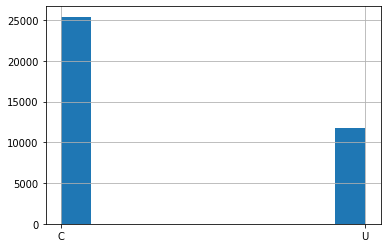

In [7]:
df_not_dummy['CLEARED'] = 'C'
df_not_dummy['CLEARED'][df['CLEARED_U'] == 1] = 'U'
df_not_dummy['CLEARED'].hist()

/home/philippe/.virtualenvs/fintech/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/philippe/.virtualenvs/fintech/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


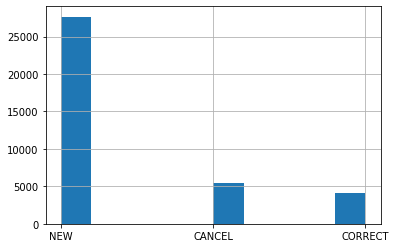

In [8]:
df_not_dummy['ACTION'] = 'CANCEL'
df_not_dummy['ACTION'][df['ACTION_CORRECT'] == 1] = 'CORRECT'
df_not_dummy['ACTION'][df['ACTION_NEW'] == 1] = 'NEW'
df_not_dummy['ACTION'].hist()

/home/philippe/.virtualenvs/fintech/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


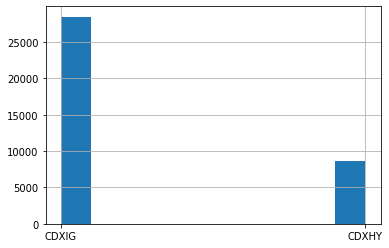

In [9]:
df_not_dummy['TAXONOMY'] = 'CDXHY'
df_not_dummy['TAXONOMY'][df['TAXONOMY_Credit:Index:CDX:CDXIG'] == 1] = 'CDXIG'
df_not_dummy['TAXONOMY'].hist()

/home/philippe/.virtualenvs/fintech/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/philippe/.virtualenvs/fintech/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/philippe/.virtualenvs/fintech/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

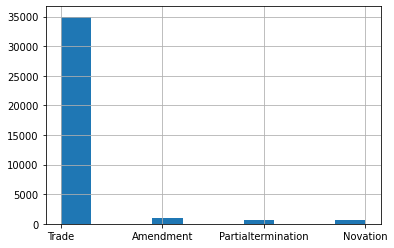

In [10]:
df_not_dummy['PRICE_FORMING_CONTINUATION_DATA'] = 'Novation'
df_not_dummy['PRICE_FORMING_CONTINUATION_DATA'][df['PRICE_FORMING_CONTINUATION_DATA_Amendment'] == 1] = 'Amendment'
df_not_dummy['PRICE_FORMING_CONTINUATION_DATA'][df['PRICE_FORMING_CONTINUATION_DATA_Partialtermination'] == 1] = 'Partialtermination'
df_not_dummy['PRICE_FORMING_CONTINUATION_DATA'][df['PRICE_FORMING_CONTINUATION_DATA_Trade'] == 1] = 'Trade'
df_not_dummy['PRICE_FORMING_CONTINUATION_DATA'].hist()

/home/philippe/.virtualenvs/fintech/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/philippe/.virtualenvs/fintech/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/philippe/.virtualenvs/fintech/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

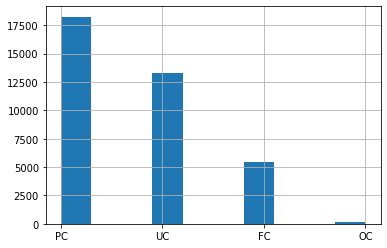

In [11]:
df_not_dummy['INDICATION_OF_COLLATERALIZATION'] = 'FC'
df_not_dummy['INDICATION_OF_COLLATERALIZATION'][df['INDICATION_OF_COLLATERALIZATION_OC'] == 1] = 'OC'
df_not_dummy['INDICATION_OF_COLLATERALIZATION'][df['INDICATION_OF_COLLATERALIZATION_PC'] == 1] = 'PC'
df_not_dummy['INDICATION_OF_COLLATERALIZATION'][df['INDICATION_OF_COLLATERALIZATION_UC'] == 1] = 'UC'
df_not_dummy['INDICATION_OF_COLLATERALIZATION'].hist()

In [12]:
df_not_dummy.to_hdf("./CDS_Preprocessed_Data.h5.gz", key="CDS", complib="zlib", complevel=9, mode='w')

In [13]:
df_not_dummy.head()

,PRICE,ROUNDED_NOTIONAL_AMOUNT,CLEARED,ACTION,TAXONOMY,PRICE_FORMING_CONTINUATION_DATA,INDICATION_OF_COLLATERALIZATION
0,0.668500,25.0,C,NEW,CDXIG,Trade,PC
1,0.668500,50.0,C,NEW,CDXIG,Trade,PC
2,0.476875,150.0,C,NEW,CDXIG,Trade,PC
3,0.478750,85.0,C,NEW,CDXIG,Trade,PC
4,0.680000,62.0,C,NEW,CDXIG,Trade,PC


In [14]:
len(df_not_dummy)

37212

In [15]:
merged = pd.DataFrame()
merged['PRICE'] = df_not_dummy['PRICE']
merged['ROUNDED_NOTIONAL_AMOUNT'] = df_not_dummy['ROUNDED_NOTIONAL_AMOUNT']

In [16]:
merged['category_csv'] = ""
merged.dtypes

PRICE                      float64
ROUNDED_NOTIONAL_AMOUNT    float64
category_csv                object
dtype: object

In [17]:
for i in range(len(df)):
    merged['category_csv'][i] = ','.join([df_not_dummy['CLEARED'][i], df_not_dummy['ACTION'][i], df_not_dummy['TAXONOMY'][i], df_not_dummy['PRICE_FORMING_CONTINUATION_DATA'][i], df_not_dummy['INDICATION_OF_COLLATERALIZATION'][i]])

merged.head()

/home/philippe/.virtualenvs/fintech/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PRICE,ROUNDED_NOTIONAL_AMOUNT,category_csv
0,0.668500,25.0,"C,NEW,CDXIG,Trade,PC"
1,0.668500,50.0,"C,NEW,CDXIG,Trade,PC"
2,0.476875,150.0,"C,NEW,CDXIG,Trade,PC"
3,0.478750,85.0,"C,NEW,CDXIG,Trade,PC"
4,0.680000,62.0,"C,NEW,CDXIG,Trade,PC"


In [18]:
len(set(merged['category_csv'].values))

111

In [19]:
category_to_index = {}
index_to_category = {}

category_to_index['<start>'] = 0
index_to_category[0] = '<start>'

for i, s in enumerate(set(merged['category_csv'].values)):
    category_to_index[s] = i + 1
    index_to_category[i + 1] = s

In [48]:
import pickle

with open("category_to_index.pkl", "wb") as f:
    pickle.dump(category_to_index, f)

with open("index_to_category.pkl", "wb") as f:
    pickle.dump(index_to_category, f)

In [20]:
merged['category'] = 0

for i in range(len(merged)):
    merged['category'][i] = category_to_index[merged['category_csv'][i]]

merged.head()

/home/philippe/.virtualenvs/fintech/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,PRICE,ROUNDED_NOTIONAL_AMOUNT,category_csv,category
0,0.668500,25.0,"C,NEW,CDXIG,Trade,PC",22
1,0.668500,50.0,"C,NEW,CDXIG,Trade,PC",22
2,0.476875,150.0,"C,NEW,CDXIG,Trade,PC",22
3,0.478750,85.0,"C,NEW,CDXIG,Trade,PC",22
4,0.680000,62.0,"C,NEW,CDXIG,Trade,PC",22


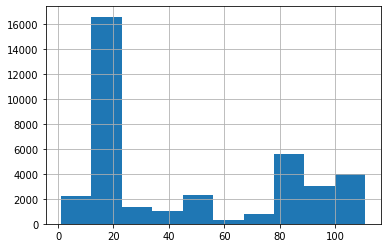

In [21]:
merged['category'].hist()

In [22]:
merged.drop('category_csv', 1).to_hdf("./save/CDS_Preprocessed_Data_merged.h5.gz", key="CDS", complib="zlib", complevel=9, mode='w')

In [23]:
merged.drop('category_csv', 1).head()

,PRICE,ROUNDED_NOTIONAL_AMOUNT,category
0,0.668500,25.0,22
1,0.668500,50.0,22
2,0.476875,150.0,22
3,0.478750,85.0,22
4,0.680000,62.0,22


In [24]:
from dataloader import Gen_Data_loader, Dis_dataloader

In [25]:
BATCH_SIZE = 64
SEQ_LENGTH = 20

gen_data_loader = Gen_Data_loader(BATCH_SIZE, SEQ_LENGTH)
dis_data_loader = Dis_dataloader(BATCH_SIZE, SEQ_LENGTH)

In [26]:
positive_file = 'save/CDS_Preprocessed_Data_merged.h5.gz'
negative_file = 'save/generator_sample.h5.gz'

In [27]:
gen_data_loader.create_batches(positive_file)

In [28]:
len(gen_data_loader.token_stream)

1856

In [29]:
gen_data_loader.token_stream[0][0]

array([ 0.66849998, 25.        , 22.        ])

In [30]:
merged.values[:5, 2]

array(['C,NEW,CDXIG,Trade,PC', 'C,NEW,CDXIG,Trade,PC',
       'C,NEW,CDXIG,Trade,PC', 'C,NEW,CDXIG,Trade,PC',
       'C,NEW,CDXIG,Trade,PC'], dtype=object)

In [31]:
%load_ext autoreload
%autoreload 2

In [32]:
from generator import Generator

vocab_size = 112
EMB_DIM = 8 # embedding dimension
HIDDEN_DIM = 8 # hidden state dimension of lstm cell
SEQ_LENGTH = 20 # sequence length
START_TOKEN = [0., 0., 0]
BATCH_SIZE = 64

generator = Generator(vocab_size, BATCH_SIZE, EMB_DIM, HIDDEN_DIM, SEQ_LENGTH, START_TOKEN)





Instructions for updating:
Use `tf.random.categorical` instead.
Instructions for updating:
Use `tf.cast` instead.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [33]:
from discriminator import Discriminator

dis_embedding_dim = 16
dis_filter_sizes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
dis_num_filters = [50, 100, 100, 100, 100, 50, 50, 50, 50, 50, 80, 80]
dis_dropout_keep_prob = 0.75
dis_l2_reg_lambda = 0.2
dis_batch_size = 64

discriminator = Discriminator(sequence_length=20, num_classes=2, vocab_size=vocab_size, embedding_size=dis_embedding_dim, 
                                filter_sizes=dis_filter_sizes, num_filters=dis_num_filters, l2_reg_lambda=dis_l2_reg_lambda)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.




In [34]:
def generate_samples(sess, trainable_model, batch_size, generated_num, output_file):
    # Generate Samples
    generated_samples = []
    for _ in range(int(generated_num / batch_size)):
        generated_samples.extend(trainable_model.generate(sess))

    data = []
    for sequence in generated_samples:
        data.extend(sequence)
    df = pd.DataFrame(data=data, columns=["PRICE", "ROUNDED_NOTIONAL_AMOUNT", "category"])
    df = df.astype({"category": 'int32'})
    df.to_hdf(output_file, key="CDS", complib="zlib", complevel=9, mode='w')

In [35]:
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
sess.run(tf.global_variables_initializer())

In [36]:
generated_num = 37212 // 20

generate_samples(sess, generator, BATCH_SIZE, generated_num, negative_file)

In [37]:
df_neg = pd.read_hdf(negative_file)
df_neg.dtypes

PRICE                      float64
ROUNDED_NOTIONAL_AMOUNT    float64
category                     int32
dtype: object

In [38]:
df_neg.head()

,PRICE,ROUNDED_NOTIONAL_AMOUNT,category
0,-0.233374,-0.056804,7
1,-0.225074,-0.051833,4
2,-0.220841,-0.050579,60
3,-0.216635,-0.048564,82
4,-0.215198,-0.046689,32


In [39]:
dis_data_loader.load_train_data(positive_file, negative_file)

In [40]:
len(dis_data_loader.sentences)

3712

In [41]:
len(dis_data_loader.sentences[0])

20

In [42]:
dis_data_loader.sentences[0]

array([[  0.6275    ,  11.        ,  20.        ],
       [  0.6275    ,   3.        ,  20.        ],
       [  0.6275    ,   3.        ,  20.        ],
       [  0.6275    ,   3.        ,  51.        ],
       [  0.6325    , 110.        ,  84.        ],
       [  0.63      , 110.        ,  86.        ],
       [  0.625     , 110.        ,  84.        ],
       [  0.62470001, 110.        ,  86.        ],
       [108.48000336,  17.        ,  55.        ],
       [  0.625     , 110.        ,  84.        ],
       [  0.6275    , 110.        ,  22.        ],
       [  0.465     , 170.        ,  22.        ],
       [  0.465     ,  85.        ,  22.        ],
       [  0.6275    ,  62.        ,  22.        ],
       [108.48000336,  17.        ,  57.        ],
       [108.55000305,  17.        ,  80.        ],
       [  0.6275    , 110.        ,  22.        ],
       [  0.465     , 200.        ,  22.        ],
       [  0.62875   ,  50.        ,  22.        ],
       [  0.62165001,  55.     

In [43]:
dis_data_loader.sentences.dtype

dtype('float64')

In [44]:
from rollout import ROLLOUT

rollout = ROLLOUT(generator, 0.8)

In [45]:
samples = generator.generate(sess)
samples[0]

array([[-2.3337430e-01, -5.6804232e-02,  5.5000000e+01],
       [-2.2385031e-01, -5.2184019e-02,  3.0000000e+00],
       [-2.2064658e-01, -5.0587930e-02,  3.5000000e+01],
       [-2.1803275e-01, -4.9323604e-02,  8.0000000e+00],
       [-2.1502404e-01, -4.8274998e-02,  9.9000000e+01],
       [-2.1459860e-01, -4.8437059e-02,  5.1000000e+01],
       [-2.1444342e-01, -4.8446972e-02,  1.0900000e+02],
       [-2.1644008e-01, -4.9534015e-02,  1.1100000e+02],
       [-2.1831235e-01, -4.9618900e-02,  6.0000000e+00],
       [-2.1575522e-01, -4.8251577e-02,  6.1000000e+01],
       [-2.1732956e-01, -4.8409455e-02,  5.5000000e+01],
       [-2.1478388e-01, -4.7948923e-02,  7.1000000e+01],
       [-2.1544982e-01, -4.7600426e-02,  1.7000000e+01],
       [-2.1780922e-01, -4.9518876e-02,  6.3000000e+01],
       [-2.1647534e-01, -4.8479673e-02,  2.2000000e+01],
       [-2.1584128e-01, -4.7861554e-02,  7.0000000e+00],
       [-2.1535510e-01, -4.7200631e-02,  4.0000000e+01],
       [-2.1435030e-01, -4.7426

In [46]:
rewards = rollout.get_reward(sess, samples, 16, discriminator)
feed = {generator.x: samples, generator.rewards: rewards}
_ = sess.run(generator.g_updates, feed_dict=feed)

In [47]:
rollout.update_params()